# Small Size Frozen Lake

In [2]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.example



Bad key "text.kerning_factor" on line 4 in
C:\Division\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
def inference(pi, policy=None, n_trees=1000, n_episode=100, zero_start=True):
    """
    pi (mdptoolbox.mdp.PolicyIteration/ValueIteration/QLearning)
    policy (list): None to use default policy
    n_trees (int): number of tree to simulate
    n_episode (int): number of sequential episode (good to be larger than N)
    zero_start (bool): whether initialize trees with zero ages or not
    
    return: (list) mean_rewards_curve (len: n_episode)
    """

    # extract parameters
    P, R = pi.P, pi.R
    r1, r2 = R[0][-1], R[1][-1]
    N, p = len(R[0]), P[0][0, 0]

    if type(policy) == type(None):
        policy = pi.policy
    policy = np.array(policy)
    wait_states = set(np.where(policy == 0)[0])

    # set hyper-parameters
    if zero_start:
        states = np.zeros((n_trees), dtype=np.uint8)  # start with 0 age
    else:
        states = np.random.randint(N, size=(n_trees))

    # start simulation
    # TODO: vectorize
    mean_rewards_curve = np.zeros((n_episode))
    for episode in range(n_episode):
        rewards = np.zeros((n_trees))

        # compute reward, then transition
        for i in range(n_trees):
            state = states[i]  # state for curr tree
            rewards[i] = R[0][state] if state in wait_states else R[1][state]

            is_fired = np.random.choice(2, p=[1-p, p])
            if state in wait_states:
                states[i] = min(state+1, N-1) if not is_fired else 0
            else:
                states[i] = 0

        mean_rewards_curve[episode] = np.mean(rewards)

    return mean_rewards_curve

def get_v_variation(results):
    rewards = []
    for item in results:
        rewards.append(item['Reward'])
    variation = np.diff(rewards)

    return variation

In [4]:
P, R = hiive.mdptoolbox.example.forest(S=2000)


# Value Iteration

In [5]:
# figsize
size = (10, 6)

iters_vi = []
for p in range(0, 10, 1):
    p /= 20
    P, R = hiive.mdptoolbox.example.forest(S=2000, p=p)
    vi = hiive.mdptoolbox.mdp.ValueIteration(
        P, R, gamma=0.99, epsilon=0.00001, max_iter=10000)
    vi.run()
    iters_vi.append(vi.iter)


AttributeError: module 'hiive.mdptoolbox' has no attribute 'mdp'

In [62]:
iters_vi


[1285, 286, 152, 102, 76, 59, 48, 40, 34, 29]

In [1]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Iterations vs Probability - VI - Forest Management")
g.set_xticklabels([0, 0, 0.1, 0.2,0.3, 0.4, 0.5])
g.set_ylabel('Iterations')
g.set_xlabel('Probability of burnt')
g.plot(iters_vi)


NameError: name 'plt' is not defined

In [64]:
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma=0.99, epsilon=0.00001, max_iter=10000)
res_vi = vi.run()

In [65]:
stats_vi = vi.run_stats

In [66]:
stats_vi

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.0030035972595214844,
  'Max V': 4.0,
  'Mean V': 1.001,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 6.178,
  'Error': 2.178,
  'Time': 0.007003068923950195,
  'Max V': 6.178,
  'Mean V': 1.00295025,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 7.6064957500000006,
  'Error': 1.4284957500000006,
  'Time': 0.011005640029907227,
  'Max V': 7.6064957500000006,
  'Mean V': 1.542746450625,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 8.492378737000001,
  'Error': 0.8858829870000005,
  'Time': 0.015015602111816406,
  'Max V': 8.492378737000001,
  'Mean V': 1.783889491224812,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 9.15364702655894,
  'Error': 0.6612682895589383,
  'Time': 0.018046855926513672,
  'Max V': 9.15364702655894,
  'Mean V': 2.1818077670181237,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 9.651663

In [67]:
inference(vi, n_episode=100).mean()

0.35169999999999996

In [68]:
policy_vi = np.array(vi.policy)
wait_vi = np.arange(len(policy_vi))
wait_vi[np.where(policy_vi == 0)]


array([   0, 1997, 1998, 1999])

In [69]:
rewards_vi = [i['Reward'] for i in stats_vi]
error_vi = [i['Error'] for i in stats_vi]
time_vi = [i['Time'] for i in stats_vi]
maxV_vi = [i['Max V'] for i in stats_vi]
meanV_vi = [i['Mean V'] for i in stats_vi]


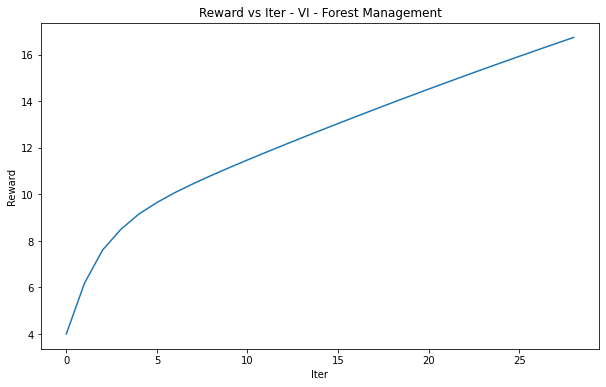

In [70]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - VI - Forest Management")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_vi)

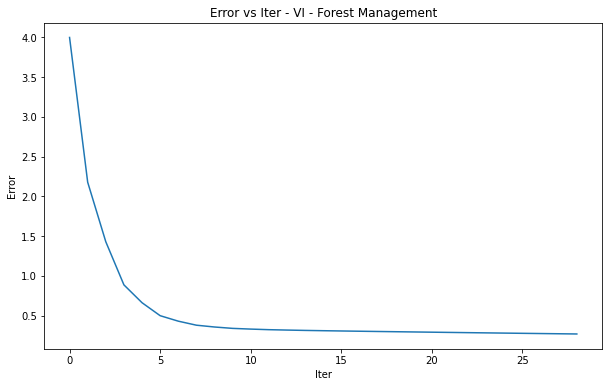

In [71]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - VI - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_vi)


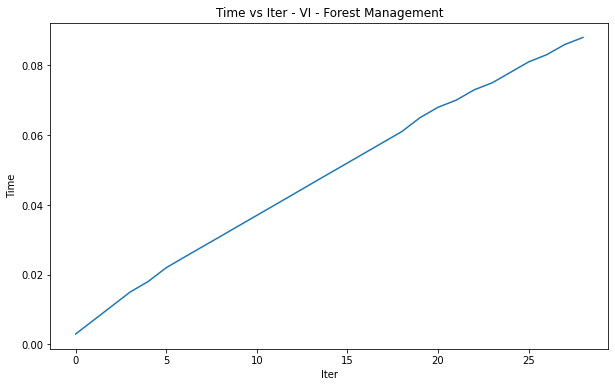

In [72]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - VI - Forest Management")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_vi)


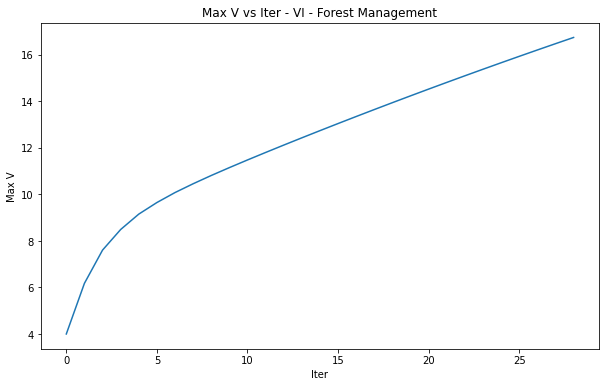

In [73]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Max V vs Iter - VI - Forest Management")
g.set_ylabel('Max V')
g.set_xlabel('Iter')
g.plot(maxV_vi)


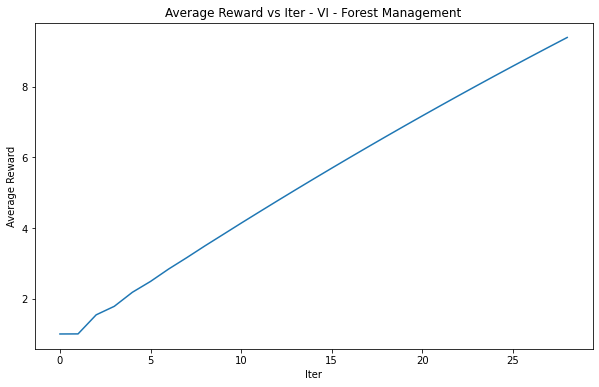

In [74]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Reward vs Iter - VI - Forest Management")
g.set_ylabel('Average Reward')
g.set_xlabel('Iter')
g.plot(meanV_vi)

In [75]:
delta_vi = get_v_variation(stats_vi)

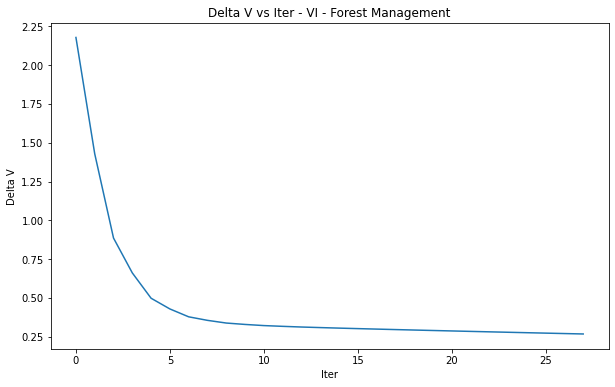

In [76]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Delta V vs Iter - VI - Forest Management")
g.set_ylabel('Delta V')
g.set_xlabel('Iter')
g.plot(delta_vi)


# Policy Iteration

In [77]:
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma=0.99, max_iter=8)
pi.run()

[{'State': None,
  'Action': None,
  'Reward': 43.261720797461585,
  'Error': 3.3601345235865807,
  'Time': 0.3310997486114502,
  'V[0]': 35.25412754936869,
  'Max V': 43.261720797461585,
  'Mean V': 35.904942611774544,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 43.261720797461585,
  'Error': 1.1821345235865834,
  'Time': 0.8202123641967773,
  'V[0]': 35.25412754936869,
  'Max V': 43.261720797461585,
  'Mean V': 35.90662267903634,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 43.261720797461585,
  'Error': 7.105427357601002e-15,
  'Time': 0.9692418575286865,
  'V[0]': 35.254127549368675,
  'Max V': 43.261720797461585,
  'Mean V': 35.90721374629812,
  'Iteration': 3}]

In [78]:
pi.time

0.9692418575286865

In [79]:
stats_pi = pi.run_stats

In [80]:
inference(pi, n_episode=100).mean()


0.3514

In [81]:
policy_pi = np.array(pi.policy)
wait_pi = np.arange(len(policy_pi))
wait_pi[np.where(policy_pi == 0)]


array([   0, 1997, 1998, 1999])

In [82]:
rewards_pi = [i['Reward'] for i in stats_pi]
error_pi = [i['Error'] for i in stats_pi]
time_pi = [i['Time'] for i in stats_pi]
V0_pi = [i['V[0]'] for i in stats_pi]
meanV_pi = [i['Mean V'] for i in stats_pi]


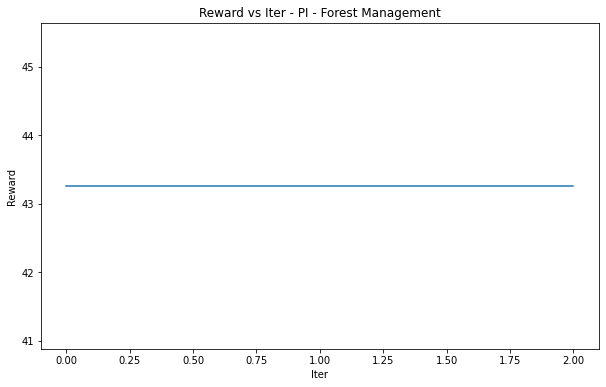

In [83]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - PI - Forest Management")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_pi)

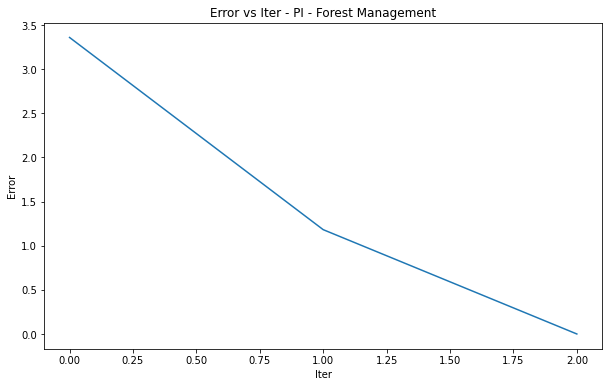

In [84]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - PI - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_pi)


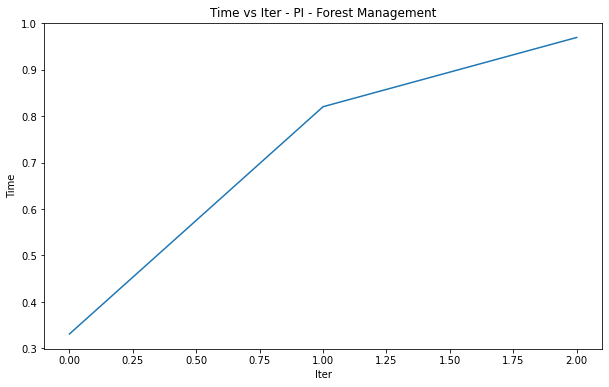

In [85]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - PI - Forest Management")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_pi)


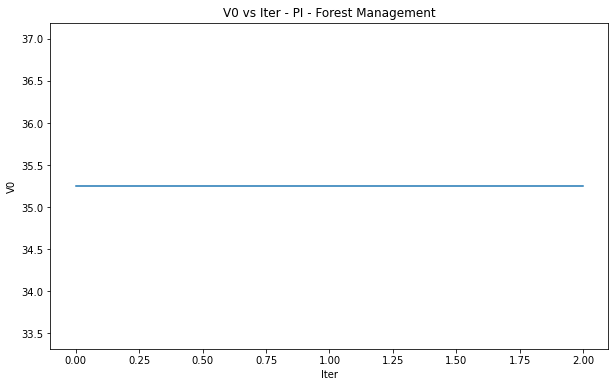

In [86]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V0 vs Iter - PI - Forest Management")
g.set_ylabel('V0')
g.set_xlabel('Iter')
g.plot(V0_pi)

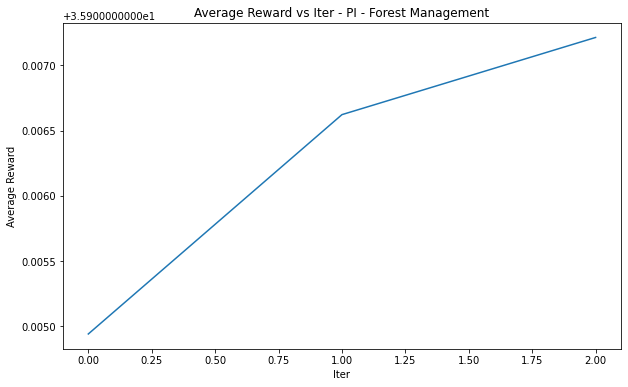

In [87]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Reward vs Iter - PI - Forest Management")
g.set_ylabel('Average Reward')
g.set_xlabel('Iter')
g.plot(meanV_pi)


In [88]:
delta_pi = get_v_variation(stats_pi)

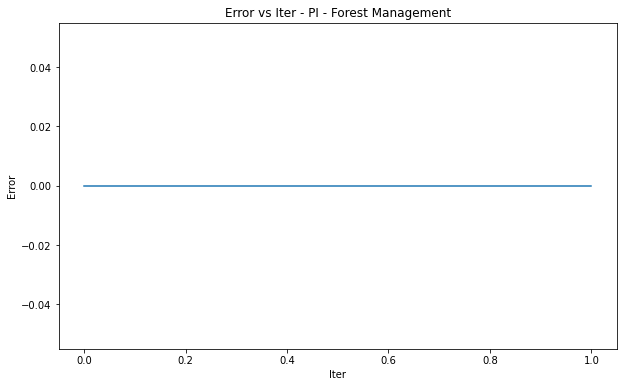

In [89]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - PI - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(delta_pi)


# Q-Learning

In [90]:
q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma=0.99, epsilon=0.03, epsilon_decay=1, alpha_decay=1, n_iter=1000000)
q.run()

In [ ]:
q.time

140.18345284461975

In [ ]:
inference(q, n_episode=100).mean()

0.35251999999999994

In [ ]:
q.max_iter

1000000

In [ ]:
policy_q = np.array(q.policy)
wait_q = np.arange(len(policy_q))
print(len(wait_q[np.where(policy_q == 0)]))
for i in wait_q[np.where(policy_q == 0)]:
    print(i, end=' ')


1673
0 3 4 5 6 7 9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 41 42 44 45 46 47 48 49 50 51 52 53 54 56 57 58 59 60 61 63 64 65 66 68 69 70 71 73 74 76 77 78 79 80 81 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 101 102 103 104 105 106 107 108 109 110 112 113 114 115 116 117 118 120 123 124 125 126 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 145 148 149 150 151 152 154 155 156 157 161 162 163 164 165 166 167 168 169 170 172 173 174 177 178 179 180 181 182 183 184 185 186 187 188 189 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 207 209 210 211 212 213 215 216 217 218 219 221 222 223 224 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 242 244 245 246 247 249 250 251 252 253 254 256 257 258 259 260 261 262 263 264 266 267 268 269 271 272 273 275 276 277 278 279 280 282 283 284 285 288 289 290 291 292 293 294 295 296 297 299 300 302 303 305 306 307 308 310 311 312 313 315 316 317 318 319 320 322 323 324 325

In [ ]:
stats_q = q.run_stats

In [ ]:
rewards_q = [i['Reward'] for i in stats_q]
error_q = [i['Error'] for i in stats_q]
time_q = [i['Time'] for i in stats_q]
V0_q = [i['V[0]'] for i in stats_q]
maxV_q = [i['Max V'] for i in stats_q]
meanV_q = [i['Mean V'] for i in stats_q]


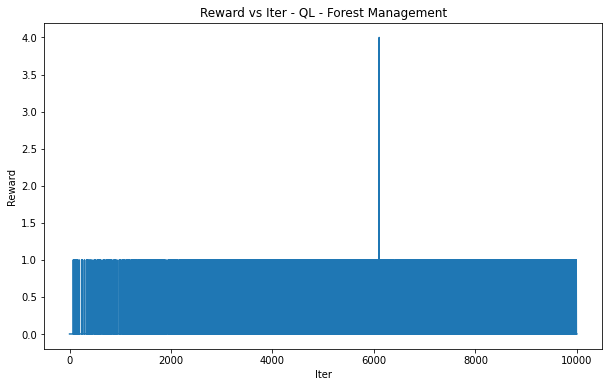

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - QL - Forest Management")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_q)

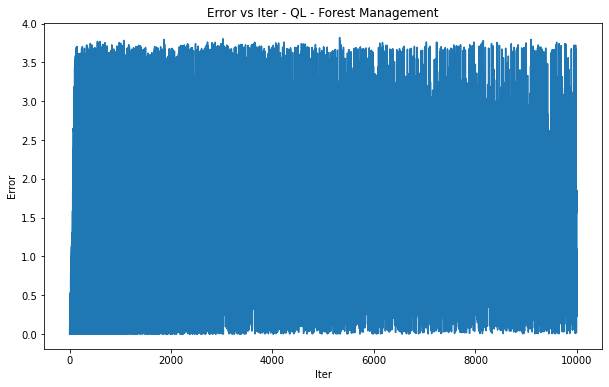

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - QL - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_q)


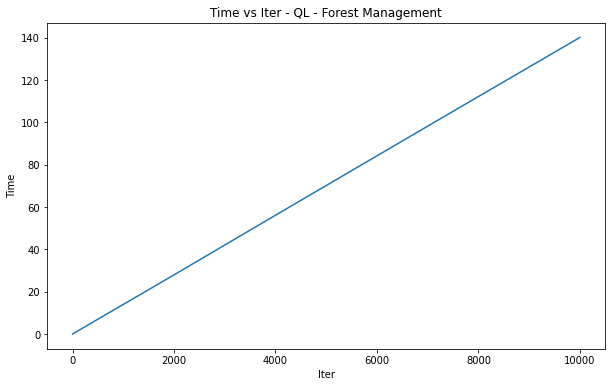

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - QL - Forest Management")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_q)


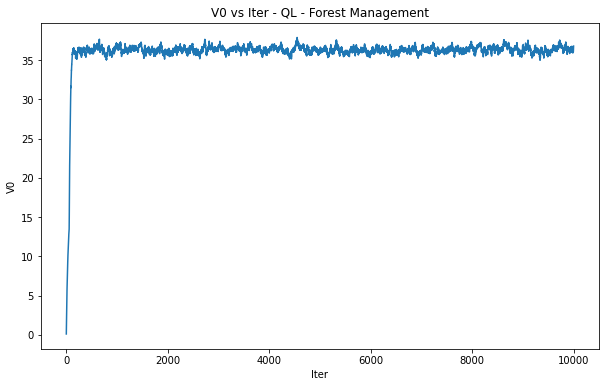

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V0 vs Iter - QL - Forest Management")
g.set_ylabel('V0')
g.set_xlabel('Iter')
g.plot(V0_q)

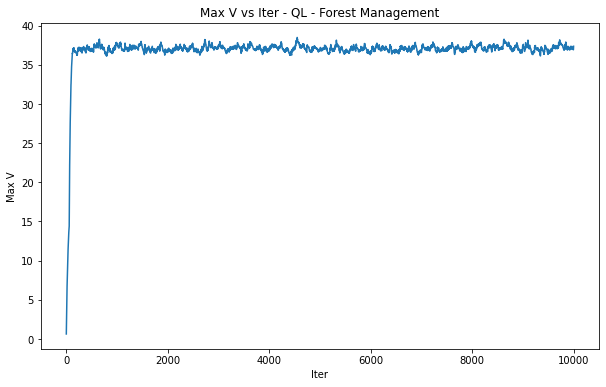

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Max V vs Iter - QL - Forest Management")
g.set_ylabel('Max V')
g.set_xlabel('Iter')
g.plot(maxV_q)


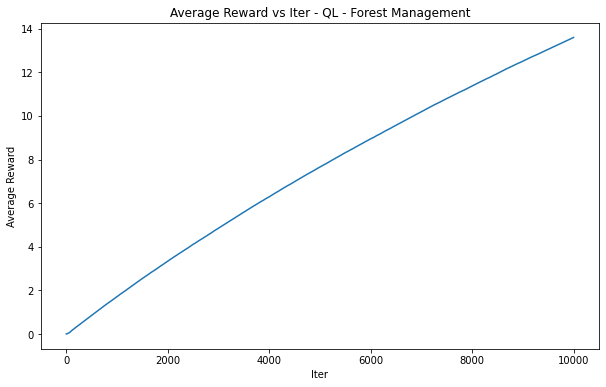

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Reward vs Iter - QL - Forest Management")
g.set_ylabel('Average Reward')
g.set_xlabel('Iter')
g.plot(meanV_q)


In [ ]:
delta_q = get_v_variation(stats_q)

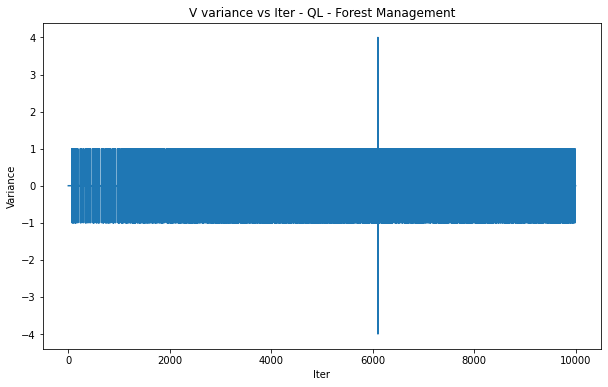

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V variance vs Iter - QL - Forest Management")
g.set_ylabel('Variance')
g.set_xlabel('Iter')
g.plot(delta_q)


In [ ]:
environment = 'FrozenLake-v1'
env_ = gym.make(environment)
env_.reset()
print('VI test score:', test(env_, convertPolicy(env_, vi.policy), 10000))
print('PI test score:', test(env_, convertPolicy(env_, pi.policy), 10000))
print('QL test score:', test(env_, convertPolicy(env_, q.policy), 10000))


NameError: name 'test' is not defined

In [ ]:
print('VI test score: ', inference(vi, n_episode=100).mean())
print('PI test score:', inference(pi, n_episode=100).mean())
print('QL test score', inference(q, n_episode=100).mean())


VI test score:  0.47141
PI test score: 0.47159
QL test score 0.47055
